Found 12332 images belonging to 4 classes.
Found 3076 images belonging to 4 classes.


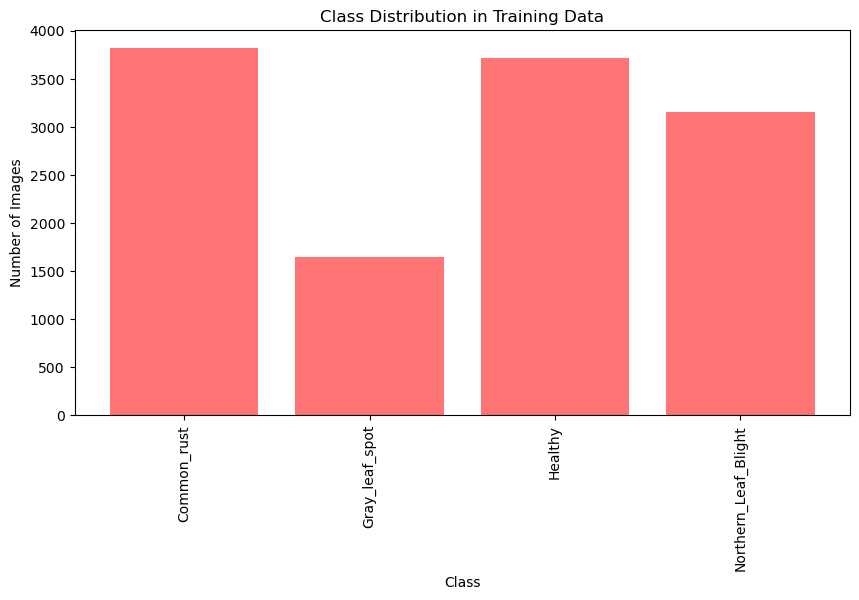

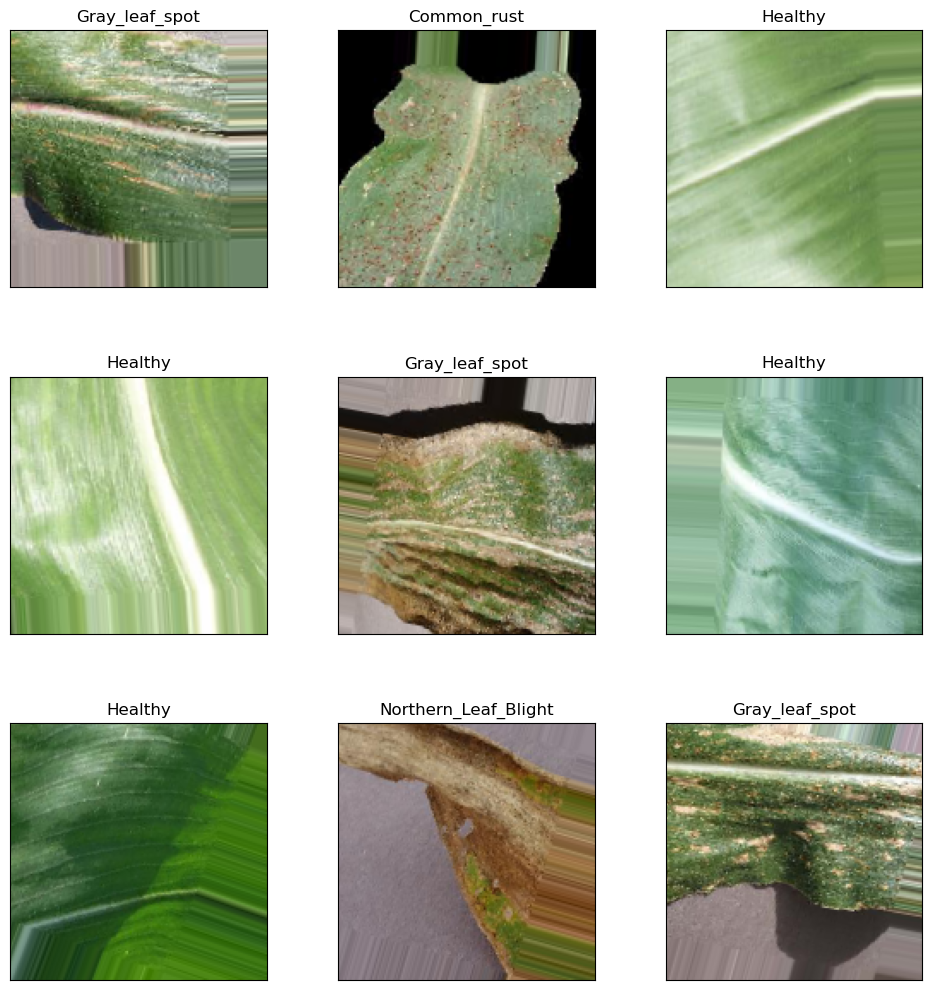

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for your training and test directories
train_dir = 'train'
test_dir = 'test'

# Define parameters for image size and batch size
img_height, img_width = 150, 150
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=20,    
    zoom_range=0.15,        
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.15,       
    horizontal_flip=True,   
    fill_mode="nearest"     
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# --------------------------
# Plotting Class Distribution
# --------------------------
# Count class distribution in the training set
values_counter = Counter(train_data.classes)

# Sort classes based on the assigned index to ensure correct order
sorted_classes = sorted(train_data.class_indices, key=train_data.class_indices.get)
counts = [values_counter[train_data.class_indices[cls]] for cls in sorted_classes]

plt.figure(figsize=(10, 5))
plt.bar(sorted_classes, counts, color=(1, 0.1, 0.1, 0.6))
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.show()

# --------------------------
# Visualizing Sample Images
# --------------------------
# Create a mapping from index to class label
labels = {v: k for k, v in train_data.class_indices.items()}

# Fetch one batch of images and labels
x_batch, y_batch = next(iter(train_data))

plt.figure(figsize=(10, 10))
num_images = min(9, x_batch.shape[0])
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    image = x_batch[i]
    label_idx = np.argmax(y_batch[i])
    plt.imshow(image)
    plt.title(labels[label_idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout(h_pad=5)
plt.show()
